In [1]:
import pandas
import pandas as pd
from pandas import DataFrame as df
import pickle
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import AllChem as Chem
import rdkit.Chem

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
path = '/Users/dis/PycharmProjects/colocalization-plot/pos_san'
pos_df = pd.read_pickle(path) 

path = '/Users/dis/PycharmProjects/colocalization-plot/neg_san'
neg_df = pd.read_pickle(path)

In [3]:
pos_df.columns

Index(['formula', 'adduct', 'msm', 'fdr', 'off_sample', 'intensity_avg',
       'msm_H2O', 'fdr_H2O', 'off_sample_H2O', 'intensity_avg_H2O',
       'has_matching_loss', 'colocalization', 'ds_id', 'lir', 'polarity', 'id',
       'any_loss', 'loss_wparent', 'a_CA', 'b_CA', 'c_CA', 'd_OH', 'e_OH',
       'a_CA-b_CA', 'a_CA-c_CA', 'a_CA-d_OH', 'a_CA-e_OH', 'b_CA-c_CA',
       'b_CA-d_OH', 'b_CA-e_OH', 'c_CA-d_OH', 'c_CA-e_OH', 'd_OH-e_OH',
       'a_CA-b_CA-c_CA', 'a_CA-b_CA-d_OH', 'a_CA-b_CA-e_OH', 'a_CA-c_CA-d_OH',
       'a_CA-c_CA-e_OH', 'a_CA-d_OH-e_OH', 'b_CA-c_CA-d_OH', 'b_CA-c_CA-e_OH',
       'b_CA-d_OH-e_OH', 'c_CA-d_OH-e_OH', 'a_CA-b_CA-c_CA-d_OH',
       'a_CA-b_CA-c_CA-e_OH', 'a_CA-b_CA-d_OH-e_OH', 'a_CA-c_CA-d_OH-e_OH',
       'b_CA-c_CA-d_OH-e_OH', 'a_CA-b_CA-c_CA-d_OH-e_OH', 'confuse',
       'mol_name', 'Molecule', 'bits'],
      dtype='object')

In [4]:
# Do analysis first for any loss!
# p_expt_wp = np.array(pos_df.loss_wparent.astype('bool'))
# n_expt_wp = np.array(neg_df.loss_wparent.astype('bool'))

p_x = list(pos_df.bits)
p_x = np.array(p_x)
p_x = np.squeeze(p_x)
p_y = np.array(pos_df.loss_wparent.astype('bool'))

n_x = list(neg_df.bits)
n_x = np.array(n_x)
n_x = np.squeeze(n_x)
n_y = np.array(neg_df.loss_wparent.astype('bool'))

In [5]:
np.array(n_x).shape

(1000, 1024)

In [5]:
np.array(n_y).shape

(1000,)

In [6]:
p_x_train, p_x_test, p_y_train, p_y_test = train_test_split(p_x,
                                                            p_y,
                                                            random_state =0
                                                           )
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x,
                                                            n_y,
                                                            random_state =0
                                                           )

Apply the various models from "Introduciton to machine learning with Python" by Muller and Guido to this data!

First try "KNeighbors"

In [7]:
kn_clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
kn_clf.fit(p_x_train, p_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
kn_clf.score(p_x_train, p_y_train)

0.8997050147492626

In [10]:
kn_clf.score(p_x_test, p_y_test)

0.8147058823529412

In [11]:
kn_clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
kn_clf.fit(n_x_train, n_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
kn_clf.score(n_x_train, n_y_train)

0.924

In [14]:
kn_clf.score(n_x_test, n_y_test)

0.824

Now try "Linear Regression"

In [15]:
p_lr = LinearSVC(max_iter=10000).fit(p_x_train, p_y_train)
n_lr = LinearSVC(max_iter=10000).fit(n_x_train, n_y_train)

In [16]:
p_lr.score(p_x_train, p_y_train)

0.9341199606686332

In [17]:
p_lr.score(p_x_test, p_y_test)

0.8352941176470589

In [18]:
n_lr.score(n_x_train, n_y_train)

0.9466666666666667

In [19]:
n_lr.score(n_x_test, n_y_test)

0.84

Now try Naive Bayes, use Bernoulli re: binary or Boolean data:

In [20]:
p_nb = BernoulliNB().fit(p_x_train, p_y_train)
n_nb = BernoulliNB().fit(n_x_train, n_y_train)

In [21]:
p_nb.score(p_x_train, p_y_train)

0.8731563421828908

In [22]:
p_nb.score(p_x_test, p_y_test)

0.7735294117647059

In [23]:
n_nb.score(n_x_train, n_y_train)

0.8946666666666667

In [24]:
n_nb.score(n_x_test, n_y_test)

0.8

Now let's try a decesion tree classifier!

In [25]:
p_tree = DecisionTreeClassifier(max_depth=5, random_state=0).fit(p_x_train, p_y_train)
n_tree = DecisionTreeClassifier(max_depth=5, random_state=0).fit(n_x_train, n_y_train)

In [26]:
p_tree.score(p_x_train, p_y_train)

0.8918387413962635

In [27]:
p_tree.score(p_x_test, p_y_test)

0.8558823529411764

In [28]:
n_tree.score(n_x_train, n_y_train)

0.9013333333333333

In [29]:
n_tree.score(n_x_test, n_y_test)

0.816

In [30]:
export_graphviz(p_tree, out_file='p_tree.dot')
export_graphviz(p_tree, out_file='n_tree.dot')

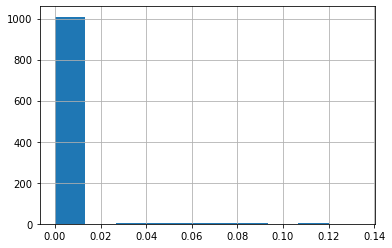

In [31]:
pd.Series(p_tree.feature_importances_).hist()

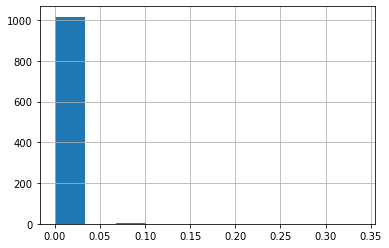

In [32]:
pd.Series(n_tree.feature_importances_).hist()

Let's try to make a random forest classifier!

In [33]:
p_rf = RandomForestClassifier(max_features=32, n_estimators=100, random_state=0).fit(p_x_train, p_y_train)
n_rf = RandomForestClassifier(max_features=32, n_estimators=100, random_state=0).fit(n_x_train, n_y_train)

In [34]:
p_rf.score(p_x_train, p_y_train)

0.9341199606686332

In [35]:
p_rf.score(p_x_test, p_y_test)

0.8352941176470589

In [36]:
n_rf.score(n_x_train, n_y_train)

0.9466666666666667

In [37]:
n_rf.score(n_x_test, n_y_test)

0.844

Gradient boosted regression tree / GB machines:

In [38]:
p_gb = GradientBoostingClassifier(random_state=0, max_depth=3).fit(p_x_train, p_y_train)
n_gb = GradientBoostingClassifier(random_state=0, max_depth=3).fit(n_x_train, n_y_train)

In [39]:
p_gb.score(p_x_train, p_y_train)

0.9105211406096362

In [40]:
p_gb.score(p_x_test, p_y_test)

0.8470588235294118

In [41]:
n_gb.score(n_x_train, n_y_train)

0.9293333333333333

In [42]:
n_gb.score(n_x_test, n_y_test)

0.852

(Kernalized) Support Vector Machine (SVM):
*Parameters would likely need to be tuned...

In [43]:
p_svm = SVC(kernel='rbf', C=10, gamma=1.0).fit(p_x_train, p_y_train)
n_svm = SVC(kernel='rbf', C=10, gamma=1.0).fit(n_x_train, n_y_train)

In [44]:
p_svm.score(p_x_train, p_y_train)

0.9341199606686332

In [45]:
p_svm.score(p_x_test, p_y_test)

0.85

In [46]:
n_svm.score(n_x_train, n_y_train)

0.9466666666666667

In [47]:
n_svm.score(n_x_test, n_y_test)

0.852

Neural network:

In [48]:
p_nn = MLPClassifier(solver='lbfgs', random_state=0).fit(p_x_train, p_y_train)
n_nn = MLPClassifier(solver='lbfgs', random_state=0).fit(n_x_train, n_y_train)

In [49]:
p_nn.score(p_x_train, p_y_train)

0.9341199606686332

In [50]:
p_nn.score(p_x_test, p_y_test)

0.8411764705882353

In [51]:
n_nn.score(n_x_train, n_y_train)

0.9466666666666667

In [52]:
n_nn.score(n_x_test, n_y_test)

0.816

(0, 1)

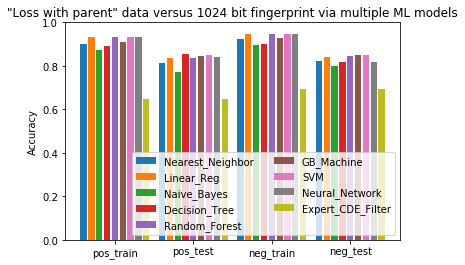

In [56]:
x_cats = ['pos_train', 'pos_test', 'neg_train', 'neg_test']
x = np.array([10, 20, 30, 40])
classes = ['Nearest_Neighbor', 'Linear_Reg', 'Naive_Bayes',
           'Decision_Tree', 'Random_Forest', 'GB_Machine',
           'SVM', 'Neural_Network', 'Expert_CDE_Filter']
y0 = np.array([0.900, 0.815, 0.924, 0.824])
y1 = np.array([0.934, 0.835, 0.947, 0.840])
y2 = np.array([0.873, 0.774, 0.895, 0.800])
y3 = np.array([0.892, 0.856, 0.901, 0.820])
y4 = np.array([0.934, 0.835, 0.947, 0.844])
y5 = np.array([0.910, 0.847, 0.929, 0.852])
y6 = np.array([0.934, 0.850, 0.947, 0.852])
y7 = np.array([0.934, 0.842, 0.947, 0.816])
y8 = np.array([0.647, 0.647, 0.693, 0.693])

w = 1

plt.bar(x + -4, y0, label = classes[0])
plt.bar(x + -3, y1, label = classes[1])
plt.bar(x + -2, y2, label = classes[2])
plt.bar(x + -1, y3, label = classes[3])
plt.bar(x + 0, y4, label = classes[4])
plt.bar(x + 1, y5, label = classes[5])
plt.bar(x + 2, y6, label = classes[6])
plt.bar(x + 3, y7, label = classes[7])
plt.bar(x + 4, y8, label = classes[8])

plt.ylabel('Accuracy')
plt.title('"Loss with parent" data versus 1024 bit fingerprint via multiple ML models')
plt.xticks(x ,x_cats)
plt.legend(loc=4, ncol=2)
plt.ylim(0,1)

No handles with labels found to put in legend.


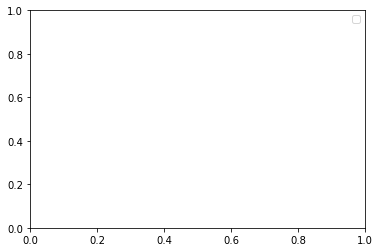

In [548]:
plt.legend(loc='best')